In [1]:
import numpy as np
import pandas as pd
from tqdm.autonotebook import tqdm
import matplotlib.pyplot as plt

/home/AD/tsainbur/anaconda3/envs/tfumap/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  This is separate from the ipykernel package so we can avoid doing imports until


In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_completeness_v_measure

In [3]:
from tfumap.paths import ensure_dir, MODEL_DIR, DATA_DIR

In [4]:
metrics_df = pd.concat([pd.read_pickle(i) for i in list((DATA_DIR / 'clustering_metric_df').glob('*.pickle'))])
metrics_df[:3]

,dataset,class_,dim,silhouette,homogeneity,completeness,v_measure,init_,n_clusters,model
0,mnist,PCA,2,0.377440,0.272552,0.39746,0.323363,0,5,"KMeans(n_clusters=5, random_state=0)"
1,mnist,PCA,2,0.377355,0.273045,0.39793,0.323865,1,5,"KMeans(n_clusters=5, random_state=1)"
2,mnist,PCA,2,0.377199,0.273357,0.39823,0.324184,2,5,"KMeans(n_clusters=5, random_state=2)"


In [5]:
metrics_df

,dataset,class_,dim,silhouette,homogeneity,completeness,v_measure,init_,n_clusters,model
0,mnist,PCA,2,0.377440,0.272552,0.397460,0.323363,0,5,"KMeans(n_clusters=5, random_state=0)"
1,mnist,PCA,2,0.377355,0.273045,0.397930,0.323865,1,5,"KMeans(n_clusters=5, random_state=1)"
2,mnist,PCA,2,0.377199,0.273357,0.398230,0.324184,2,5,"KMeans(n_clusters=5, random_state=2)"
3,mnist,PCA,2,0.377346,0.273049,0.397946,0.323874,3,5,"KMeans(n_clusters=5, random_state=3)"
4,mnist,PCA,2,0.377413,0.272501,0.397373,0.323298,4,5,"KMeans(n_clusters=5, random_state=4)"
...,...,...,...,...,...,...,...,...,...,...
45,fmnist,vae,2,0.375252,0.575557,0.511677,0.541740,0,14,"KMeans(n_clusters=14, random_state=0)"
46,fmnist,vae,2,0.374912,0.575514,0.511521,0.541634,1,14,"KMeans(n_clusters=14, random_state=1)"
47,fmnist,vae,2,0.374924,0.575444,0.511468,0.541573,2,14,"KMeans(n_clusters=14, random_state=2)"
48,fmnist,vae,2,0.374862,0.575051,0.511110,0.541198,3,14,"KMeans(n_clusters=14, random_state=3)"


In [6]:
metrics_df.class_.unique()

array(['PCA', 'ae_only', 'phate', 'autoencoder', 'scvis', 'direct', 'vae',
       'network', 'ivis', 'umap-learn', 'TSNE', 'parametric-tsne'],
      dtype=object)

In [7]:
import seaborn as sns

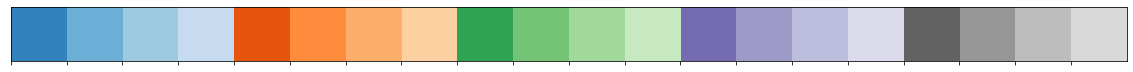

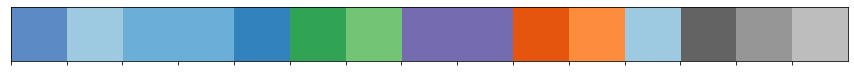

In [8]:
pal20c = sns.color_palette('tab20c', 20)
sns.palplot(pal20c)
hue_dict = {
    "umap-learn": list(np.array(pal20c[3])**4),
    "direct": pal20c[2],
    "AE": pal20c[1],
    "autoencoder": pal20c[1],
    "network": pal20c[0],
    'vae':  pal20c[8], 
    'ae_only':  pal20c[9],
    "pca":  pal20c[12],
    "PCA":  pal20c[12],
    "TSNE": pal20c[4], 
    "parametric-tsne":pal20c[5],
    "network-cpu": pal20c[2],

    
    "scvis": pal20c[16],
    "ivis": pal20c[17],
    "phate": pal20c[18],

}
sns.palplot([hue_dict[i] for i in hue_dict.keys()])

In [9]:
hue_list =  ['umap-learn', 'direct', 'network', 'autoencoder',
       'parametric-tsne', 'TSNE', 'scvis', 'ivis', 'phate', 'vae', 'ae_only', 'PCA']

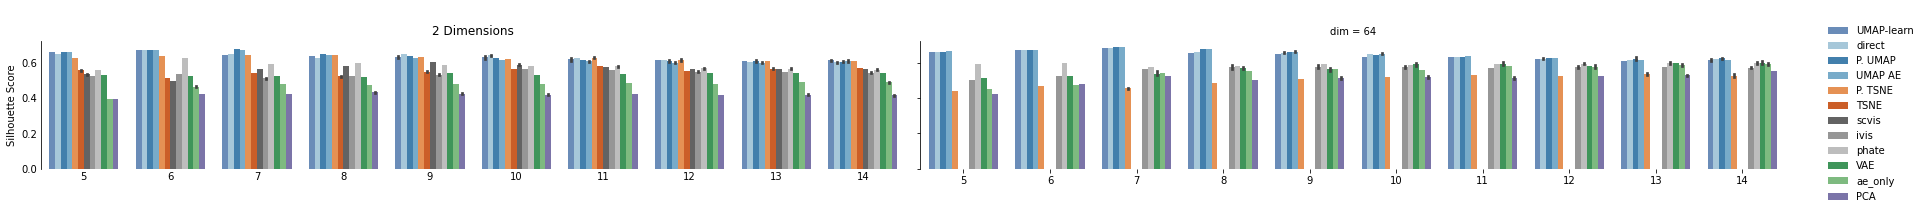

In [10]:
fg = sns.catplot(
    x="n_clusters",
    y="v_measure",
    hue="class_",
    hue_order=hue_list,
    #order = ['mnist', 'fmnist', 'macosko2015', 'cassins_dtw', 'cifar10'],
    col="dim",
    height=2.5, 
    aspect=5,
    data=metrics_df[metrics_df.dataset == 'fmnist'],
    kind="bar",
    palette=[hue_dict[i] for i in hue_list],
    #legend=False
)
(fg.despine(bottom=True)
 #.set_xticklabels(['MNIST', 'FMNIST', 'Retina', 'Cassin\'s', 'CIFAR10'])
 .set_axis_labels("", "Silhouette Score")
)
ax = fg.axes[0][0]
ax.tick_params(axis=u'both', which=u'both',length=0)
fg._legend._legend_title_box._text.set_text("")

ax.set_title('2 Dimensions')



fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'umap-learn'))[0][0]].set_text('UMAP-learn')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'network'))[0][0]].set_text('P. UMAP')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'autoencoder'))[0][0]].set_text('UMAP AE')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'parametric-tsne'))[0][0]].set_text('P. TSNE')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'vae'))[0][0]].set_text('VAE')

#save_fig(FIGURE_DIR/'silhouette-test', save_pdf=True, dpi=300)

In [11]:
metrics_df[:3]

,dataset,class_,dim,silhouette,homogeneity,completeness,v_measure,init_,n_clusters,model
0,mnist,PCA,2,0.377440,0.272552,0.39746,0.323363,0,5,"KMeans(n_clusters=5, random_state=0)"
1,mnist,PCA,2,0.377355,0.273045,0.39793,0.323865,1,5,"KMeans(n_clusters=5, random_state=1)"
2,mnist,PCA,2,0.377199,0.273357,0.39823,0.324184,2,5,"KMeans(n_clusters=5, random_state=2)"


In [12]:
metrics_df[(metrics_df.dataset == 'cassins_dtw') & (metrics_df.class_ == 'ae_only')]

,dataset,class_,dim,silhouette,homogeneity,completeness,v_measure,init_,n_clusters,model
0,cassins_dtw,ae_only,2,0.406004,0.303372,0.550551,0.391187,0,10,"KMeans(n_clusters=10, random_state=0)"
1,cassins_dtw,ae_only,2,0.406065,0.303442,0.550766,0.391299,1,10,"KMeans(n_clusters=10, random_state=1)"
2,cassins_dtw,ae_only,2,0.406113,0.303368,0.550724,0.391227,2,10,"KMeans(n_clusters=10, random_state=2)"
3,cassins_dtw,ae_only,2,0.406105,0.303386,0.550709,0.391238,3,10,"KMeans(n_clusters=10, random_state=3)"
4,cassins_dtw,ae_only,2,0.406191,0.303576,0.551096,0.391494,4,10,"KMeans(n_clusters=10, random_state=4)"
...,...,...,...,...,...,...,...,...,...,...
95,cassins_dtw,ae_only,2,0.439537,0.586736,0.610595,0.598428,0,29,"KMeans(n_clusters=29, random_state=0)"
96,cassins_dtw,ae_only,2,0.434805,0.563134,0.603179,0.582469,1,29,"KMeans(n_clusters=29, random_state=1)"
97,cassins_dtw,ae_only,2,0.437031,0.540524,0.591563,0.564893,2,29,"KMeans(n_clusters=29, random_state=2)"
98,cassins_dtw,ae_only,2,0.434973,0.563468,0.603589,0.582839,3,29,"KMeans(n_clusters=29, random_state=3)"


In [13]:
metrics_df.loc[metrics_df.dataset == 'cassins', 'dataset'] = 'cassins_dtw'

In [14]:
metrics_df[(metrics_df.dataset == 'cassins_dtw') & (metrics_df.class_ == 'ae_only')].dim.unique()

array([2, 64], dtype=object)

### plot on the basis of the best silhouette score

In [15]:
### get the best silhouette score for each dataset, class_, dim_
metrics_df_max_iter = []
for dataset in metrics_df.dataset.unique():
    for class_ in metrics_df.class_.unique():
        for dim in metrics_df.dim.unique():
            subset_df = metrics_df[
                (dataset == metrics_df.dataset.values) &
                (class_ == metrics_df.class_.values) &
                (dim == metrics_df.dim.values) 
            ]
            if len(subset_df) > 0:
                #print(np.argmax(subset_df.silhouette))
                metrics_df_max_iter.append(subset_df.iloc[np.argmax(subset_df.silhouette)])

In [16]:
metrics_max_df = pd.concat(metrics_df_max_iter, axis=1).T.reset_index()
metrics_max_df[:3]

,index,dataset,class_,dim,silhouette,homogeneity,completeness,v_measure,init_,n_clusters,model
0,0,mnist,PCA,2,0.377440,0.272552,0.397460,0.323363,0,5,"KMeans(n_clusters=5, random_state=0)"
1,18,mnist,PCA,64,0.091285,0.472775,0.532840,0.501013,3,8,KMeans(random_state=3)
2,5,mnist,ae_only,2,0.493923,0.307547,0.611768,0.409321,0,6,"KMeans(n_clusters=6, random_state=0)"


In [17]:
metrics_max_df

,index,dataset,class_,dim,silhouette,homogeneity,completeness,v_measure,init_,n_clusters,model
0,0,mnist,PCA,2,0.377440,0.272552,0.397460,0.323363,0,5,"KMeans(n_clusters=5, random_state=0)"
1,18,mnist,PCA,64,0.091285,0.472775,0.532840,0.501013,3,8,KMeans(random_state=3)
2,5,mnist,ae_only,2,0.493923,0.307547,0.611768,0.409321,0,6,"KMeans(n_clusters=6, random_state=0)"
3,14,mnist,ae_only,64,0.097951,0.389987,0.467557,0.425264,4,7,"KMeans(n_clusters=7, random_state=4)"
4,17,mnist,phate,2,0.497290,0.626821,0.726011,0.672780,2,8,KMeans(random_state=2)
...,...,...,...,...,...,...,...,...,...,...,...
110,1,fmnist,umap-learn,2,0.593261,0.545792,0.835568,0.660286,1,5,"KMeans(n_clusters=5, random_state=1)"
111,3,fmnist,umap-learn,64,0.617365,0.545684,0.835487,0.660182,3,5,"KMeans(n_clusters=5, random_state=3)"
112,14,fmnist,TSNE,2,0.403672,0.498499,0.590891,0.540777,4,7,"KMeans(n_clusters=7, random_state=4)"
113,4,fmnist,parametric-tsne,2,0.504765,0.517906,0.787408,0.624835,4,5,"KMeans(n_clusters=5, random_state=4)"


In [18]:
metrics_max_df.class_.unique()

array(['PCA', 'ae_only', 'phate', 'autoencoder', 'scvis', 'direct', 'vae',
       'network', 'ivis', 'umap-learn', 'TSNE', 'parametric-tsne'],
      dtype=object)

In [19]:
from tfumap.paths import FIGURE_DIR, save_fig

### Clustering results (NMI)

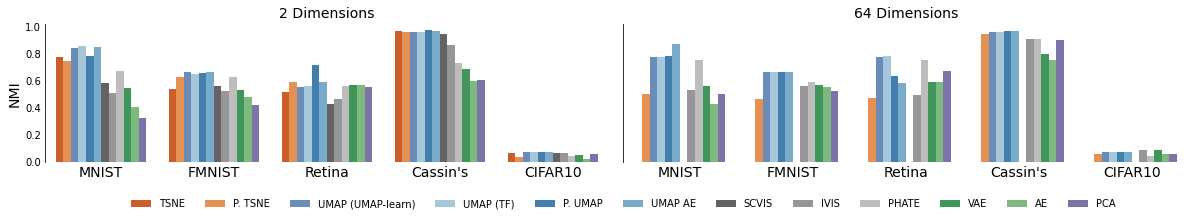

In [20]:
#sns.set(font_scale=1.0)
import matplotlib as mpl
axes = {'labelsize': 14,
        'titlesize': 14,}
mpl.rc('axes', **axes)
mpl.rcParams['xtick.labelsize'] = 14

hue_list =  ['TSNE', 'parametric-tsne', 'umap-learn',  'direct', 'network', 'autoencoder',
        'scvis', 'ivis', 'phate', 'vae', 'ae_only', 'PCA']
fg = sns.catplot(
    x="dataset",
    y="v_measure",
    hue="class_",
    hue_order=hue_list,
    order = ['mnist', 'fmnist', 'macosko2015', 'cassins_dtw', 'cifar10'],
    col="dim",
    height=2.75, #2.65, 
    aspect=3,#2.5,#3,
    data=metrics_max_df,
    kind="bar",
    palette=[hue_dict[i] for i in hue_list],
    legend=False
)
(fg.despine(bottom=True)
 .set_xticklabels(['MNIST', 'FMNIST', 'Retina', 'Cassin\'s', 'CIFAR10'])
 .set_axis_labels("", "NMI")
)
ax = fg.axes[0][0]
ax.tick_params(axis=u'both', which=u'both',length=0)
#fg._legend.texts[2].set_text("P. UMAP")
#fg._legend.texts[3].set_text("UMAP AE")
ax.set_title('2 Dimensions')
if len(fg.axes[0])>1:
    ax = fg.axes[0][1]
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.set_title('64 Dimensions')

if True:
    #leg = plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.1))
    leg = plt.legend(loc='upper center', bbox_to_anchor=(0, -0.2), ncol = len(hue_list), fontsize=10)

else:
    leg = fg._legend
    
leg.get_frame().set_edgecolor('w')
    
leg._legend_title_box._text.set_text("")
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'umap-learn'))[0][0]].set_text('UMAP (UMAP-learn)')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'network'))[0][0]].set_text('P. UMAP')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'direct'))[0][0]].set_text('UMAP (TF)')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'autoencoder'))[0][0]].set_text('UMAP AE')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'parametric-tsne'))[0][0]].set_text('P. TSNE')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'ae_only'))[0][0]].set_text('AE')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'vae'))[0][0]].set_text('VAE')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'phate'))[0][0]].set_text('PHATE')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'scvis'))[0][0]].set_text('SCVIS')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'ivis'))[0][0]].set_text('IVIS')

save_fig(FIGURE_DIR/'NMI', save_pdf=True, dpi=300)

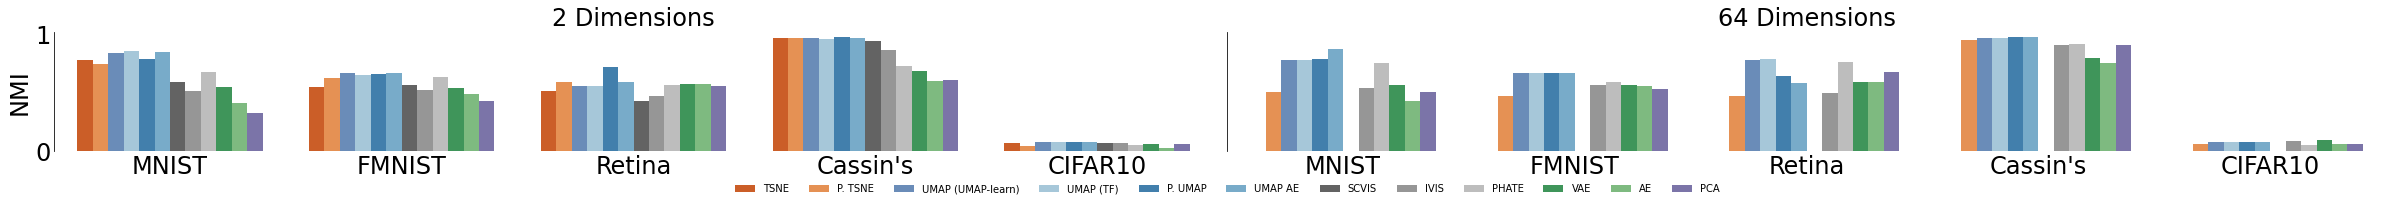

In [21]:
#sns.set(font_scale=1.0)
import matplotlib as mpl
axes = {'labelsize': 24,
        'titlesize': 24,}
mpl.rc('axes', **axes)
mpl.rcParams['xtick.labelsize'] = 24
mpl.rcParams['ytick.labelsize'] = 24

hue_list =  ['TSNE', 'parametric-tsne', 'umap-learn',  'direct', 'network', 'autoencoder',
        'scvis', 'ivis', 'phate', 'vae', 'ae_only', 'PCA']
fg = sns.catplot(
    x="dataset",
    y="v_measure",
    hue="class_",
    hue_order=hue_list,
    order = ['mnist', 'fmnist', 'macosko2015', 'cassins_dtw', 'cifar10'],
    col="dim",
    height=2.75, #2.65, 
    aspect=6,#2.5,#3,
    data=metrics_max_df,
    kind="bar",
    palette=[hue_dict[i] for i in hue_list],
    legend=False
)
(fg.despine(bottom=True)
 .set_xticklabels(['MNIST', 'FMNIST', 'Retina', 'Cassin\'s', 'CIFAR10'])
 .set_axis_labels("", "NMI")
)
ax = fg.axes[0][0]
ax.tick_params(axis=u'both', which=u'both',length=0)
#fg._legend.texts[2].set_text("P. UMAP")
#fg._legend.texts[3].set_text("UMAP AE")
ax.set_title('2 Dimensions')
if len(fg.axes[0])>1:
    ax = fg.axes[0][1]
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.set_title('64 Dimensions')

if True:
    #leg = plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.1))
    leg = plt.legend(loc='upper center', bbox_to_anchor=(0, -0.2), ncol = len(hue_list), fontsize=10)

else:
    leg = fg._legend
    
leg.get_frame().set_edgecolor('w')
    
leg._legend_title_box._text.set_text("")
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'umap-learn'))[0][0]].set_text('UMAP (UMAP-learn)')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'network'))[0][0]].set_text('P. UMAP')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'direct'))[0][0]].set_text('UMAP (TF)')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'autoencoder'))[0][0]].set_text('UMAP AE')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'parametric-tsne'))[0][0]].set_text('P. TSNE')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'ae_only'))[0][0]].set_text('AE')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'vae'))[0][0]].set_text('VAE')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'phate'))[0][0]].set_text('PHATE')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'scvis'))[0][0]].set_text('SCVIS')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'ivis'))[0][0]].set_text('IVIS')

save_fig(FIGURE_DIR/'NMI_short', save_pdf=True, dpi=300)

#### plot on the basis of best score

In [22]:
### get the best silhouette score for each dataset, class_, dim_
metrics_df_max_iter = []
for dataset in metrics_df.dataset.unique():
    for class_ in metrics_df.class_.unique():
        for dim in metrics_df.dim.unique():
            subset_df = metrics_df[
                (dataset == metrics_df.dataset.values) &
                (class_ == metrics_df.class_.values) &
                (dim == metrics_df.dim.values) 
            ]
            if len(subset_df) > 0:
                #print(np.argmax(subset_df.silhouette))
                metrics_df_max_iter.append(subset_df.iloc[np.argmax(subset_df.v_measure)])

In [23]:
metrics_max_df = pd.concat(metrics_df_max_iter, axis=1).T.reset_index()
metrics_max_df[:3]

,index,dataset,class_,dim,silhouette,homogeneity,completeness,v_measure,init_,n_clusters,model
0,16,mnist,PCA,2,0.363991,0.347121,0.391010,0.367761,1,8,KMeans(random_state=1)
1,49,mnist,PCA,64,0.081891,0.554349,0.488848,0.519542,4,14,"KMeans(n_clusters=14, random_state=4)"
2,46,mnist,ae_only,2,0.413019,0.468532,0.530543,0.497613,1,14,"KMeans(n_clusters=14, random_state=1)"


ValueError: keyword fontsize is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_contains', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

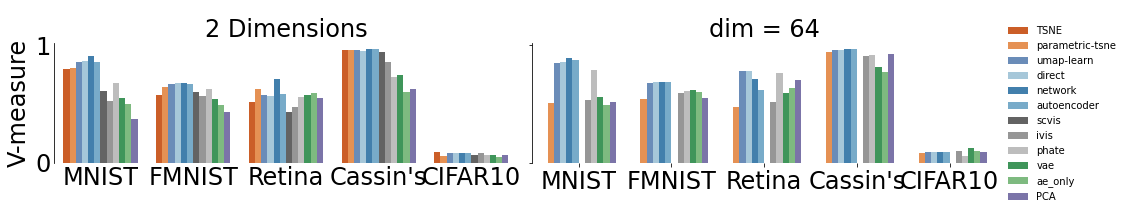

In [24]:
fg = sns.catplot(
    x="dataset",
    y="v_measure",
    hue="class_",
    hue_order=hue_list,
    order = ['mnist', 'fmnist', 'macosko2015', 'cassins_dtw', 'cifar10'],
    col="dim",
    height=2.75, #2.65, 
    aspect=2.5,#3,
    data=metrics_max_df,
    kind="bar",
    palette=[hue_dict[i] for i in hue_list],
    #legend=False
)
(fg.despine(bottom=True)
 .set_xticklabels(['MNIST', 'FMNIST', 'Retina', 'Cassin\'s', 'CIFAR10'])
 .set_axis_labels("", "V-measure")
)
ax = fg.axes[0][0]
ax.tick_params(axis=u'both', which=u'both',length=0)
fg._legend._legend_title_box._text.set_text("")
#fg._legend.texts[2].set_text("P. UMAP")
#fg._legend.texts[3].set_text("UMAP AE")
ax.set_title('2 Dimensions')
if len(fg.axes[0])>1:
    ax = fg.axes[0][1]
    ax.tick_params(axis=u'both', which=u'both',length=0, fontsize=12)
    ax.set_title('64 Dimensions')


fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'umap-learn'))[0][0]].set_text('UMAP (UMAP-learn)')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'network'))[0][0]].set_text('P. UMAP')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'autoencoder'))[0][0]].set_text('UMAP AE')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'parametric-tsne'))[0][0]].set_text('P. TSNE')

#save_fig(FIGURE_DIR/'v-measure', save_pdf=True, dpi=300)